In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


# Feature Engineering

In [4]:
def get_features(df):
    df['date'] = pd.to_datetime(df['date'])
    df['day of week'] = df['date'].dt.day_name()
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df = pd.get_dummies(df_test, columns=['country', 'store', 'product', 'day of week'])
    
    return df

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['day of week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [7]:
df

,row_id,date,country,store,product,num_sold,day of week,month,year
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,Thursday,1,2015
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,Thursday,1,2015
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,Thursday,1,2015
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,Thursday,1,2015
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,Thursday,1,2015
...,...,...,...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823,Monday,12,2018
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250,Monday,12,2018
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004,Monday,12,2018
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441,Monday,12,2018


# Analysis

In [8]:
df['product'].value_counts()

Kaggle Sticker    8766
Kaggle Mug        8766
Kaggle Hat        8766
Name: product, dtype: int64

<AxesSubplot:xlabel='product', ylabel='num_sold'>

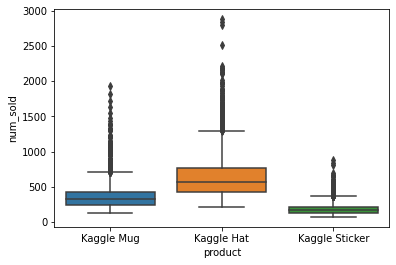

In [9]:
sns.boxplot(x=df['product'], y=df['num_sold'])

<AxesSubplot:xlabel='store', ylabel='num_sold'>

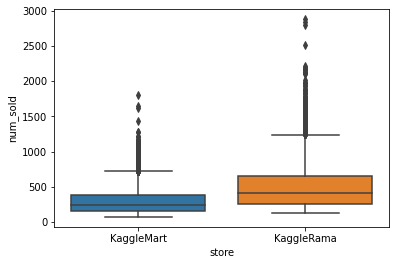

In [10]:
sns.boxplot(x=df['store'], y=df['num_sold'])

<AxesSubplot:xlabel='country', ylabel='num_sold'>

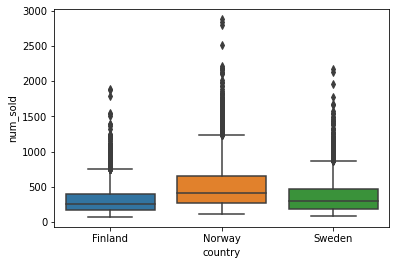

In [11]:
sns.boxplot(x=df['country'], y=df['num_sold'])

<AxesSubplot:xlabel='year', ylabel='num_sold'>

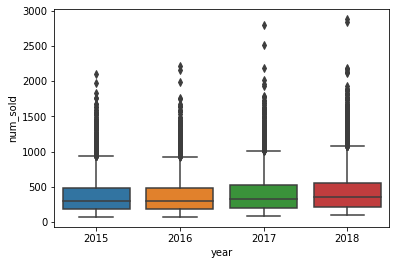

In [12]:
sns.boxplot(x=df['year'], y=df['num_sold'])

<AxesSubplot:xlabel='day of week', ylabel='num_sold'>

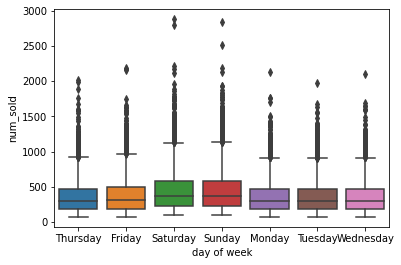

In [13]:
sns.boxplot(x=df['day of week'], y=df['num_sold'])

<AxesSubplot:xlabel='month', ylabel='num_sold'>

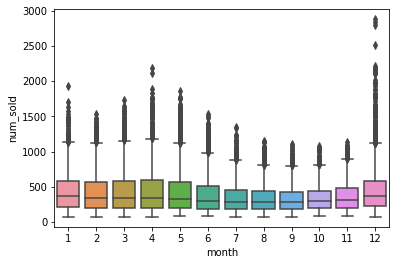

In [14]:
sns.boxplot(x=df['month'], y=df['num_sold'])

In [15]:
df_store = df.groupby(['store']).agg('mean')
print(df_store)

             row_id    num_sold    month         year
store                                                
KaggleMart  13147.0  282.558978  6.52293  2016.499658
KaggleRama  13150.0  492.508176  6.52293  2016.499658


<BarContainer object of 2 artists>

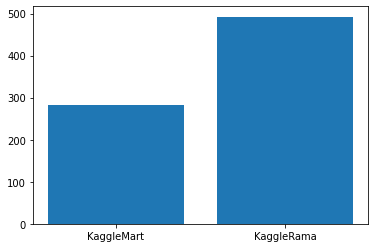

In [16]:
plt.bar(df_store.index, df_store['num_sold'])

# Mutual Information

In [17]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [18]:
df_encode = pd.get_dummies(df, columns=['country', 'store', 'product', 'day of week'])
df_encode.columns

Index(['row_id', 'date', 'num_sold', 'month', 'year', 'country_Finland',
       'country_Norway', 'country_Sweden', 'store_KaggleMart',
       'store_KaggleRama', 'product_Kaggle Hat', 'product_Kaggle Mug',
       'product_Kaggle Sticker', 'day of week_Friday', 'day of week_Monday',
       'day of week_Saturday', 'day of week_Sunday', 'day of week_Thursday',
       'day of week_Tuesday', 'day of week_Wednesday'],
      dtype='object')

In [19]:
X_encode = df_encode.drop(columns=['date', 'num_sold', 'row_id'])
y_encode = df_encode['num_sold']

In [20]:
mi_values = mutual_info_regression(X_encode, y_encode, discrete_features=True)

In [21]:
mi_dict = {}

for i in range(len(X_encode.columns)):
    mi_dict[X_encode.columns[i]] = mi_values[i]
    

In [22]:
mi_dict

{'month': 0.03638197049989689,
 'year': 0.02728845027724347,
 'country_Finland': 0.044726132570625854,
 'country_Norway': 0.08807579126464571,
 'country_Sweden': 0.037663243076873076,
 'store_KaggleMart': 0.13128251873608687,
 'store_KaggleRama': 0.13128251873608687,
 'product_Kaggle Hat': 0.28932973342240587,
 'product_Kaggle Mug': 0.1067846059824582,
 'product_Kaggle Sticker': 0.33864566007870667,
 'day of week_Friday': 0.003425027421102733,
 'day of week_Monday': 0.0,
 'day of week_Saturday': 0.015079429578590098,
 'day of week_Sunday': 0.013405289233960671,
 'day of week_Thursday': 0.002926934011951099,
 'day of week_Tuesday': 0.0,
 'day of week_Wednesday': 5.507689347972189e-05}

In [23]:
df_encode.corr()

,row_id,num_sold,month,year,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker,day of week_Friday,day of week_Monday,day of week_Saturday,day of week_Sunday,day of week_Thursday,day of week_Tuesday,day of week_Wednesday
row_id,1.000000e+00,0.068253,2.495147e-01,9.682456e-01,-5.588615e-04,-2.734879e-18,5.588615e-04,-1.975874e-04,1.975874e-04,0.000000e+00,-9.314358e-05,9.314358e-05,-9.687493e-04,1.937499e-03,-2.260711e-18,9.687493e-04,-1.937499e-03,-4.830216e-04,4.830216e-04
num_sold,6.825262e-02,1.000000,-7.566146e-02,8.951030e-02,-2.171278e-01,3.054697e-01,-8.834193e-02,-3.945358e-01,3.945358e-01,6.413087e-01,-8.817155e-02,-5.531371e-01,-1.248684e-02,-4.553248e-02,9.637993e-02,9.388186e-02,-4.051265e-02,-4.691005e-02,-4.500330e-02
month,2.495147e-01,-0.075661,1.000000e+00,4.015575e-04,-6.055730e-18,-3.188866e-18,-5.962245e-18,-1.958627e-20,1.958627e-20,-5.214368e-18,-5.203981e-18,-5.214368e-18,-7.325220e-04,-2.999926e-03,2.668584e-03,4.011799e-04,2.101733e-03,-2.708912e-03,1.266984e-03
year,9.682456e-01,0.089510,4.015575e-04,1.000000e+00,1.754696e-17,5.847383e-17,-2.333185e-17,0.000000e+00,0.000000e+00,1.752292e-17,1.753093e-17,1.751491e-17,-7.493984e-04,2.748592e-03,-7.493984e-04,9.995969e-04,-2.498394e-03,1.247498e-04,1.247498e-04
country_Finland,-5.588615e-04,-0.217128,-6.055730e-18,1.754696e-17,1.000000e+00,-5.000000e-01,-5.000000e-01,-4.477790e-20,4.477790e-20,0.000000e+00,0.000000e+00,0.000000e+00,4.275703e-17,4.274104e-17,4.275703e-17,4.275703e-17,4.275703e-17,2.131397e-17,2.131397e-17
country_Norway,-2.734879e-18,0.305470,-3.188866e-18,5.847383e-17,-5.000000e-01,1.000000e+00,-5.000000e-01,-4.477790e-20,4.477790e-20,0.000000e+00,0.000000e+00,0.000000e+00,3.211653e-17,3.210054e-17,3.212932e-17,3.214211e-17,3.210374e-17,-1.505721e-19,-1.249428e-19
country_Sweden,5.588615e-04,-0.088342,-5.962245e-18,-2.333185e-17,-5.000000e-01,-5.000000e-01,1.000000e+00,-3.582232e-20,3.582232e-20,0.000000e+00,0.000000e+00,0.000000e+00,4.274744e-17,4.276662e-17,4.274744e-17,4.274744e-17,4.274744e-17,5.766593e-20,5.766593e-20
store_KaggleMart,-1.975874e-04,-0.394536,-1.958627e-20,0.000000e+00,-4.477790e-20,-4.477790e-20,-3.582232e-20,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.808646e-20,-2.411529e-20,-1.808646e-20,-1.808646e-20,-1.808646e-20,6.040884e-21,6.040884e-21
store_KaggleRama,1.975874e-04,0.394536,1.958627e-20,0.000000e+00,4.477790e-20,4.477790e-20,3.582232e-20,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.808646e-20,2.411529e-20,1.808646e-20,1.808646e-20,1.808646e-20,-6.040884e-21,-6.040884e-21
product_Kaggle Hat,0.000000e+00,0.641309,-5.214368e-18,1.752292e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-5.000000e-01,-5.000000e-01,8.063503e-18,8.057109e-18,8.057109e-18,8.050714e-18,8.057109e-18,7.893825e-18,7.900232e-18


<AxesSubplot:>

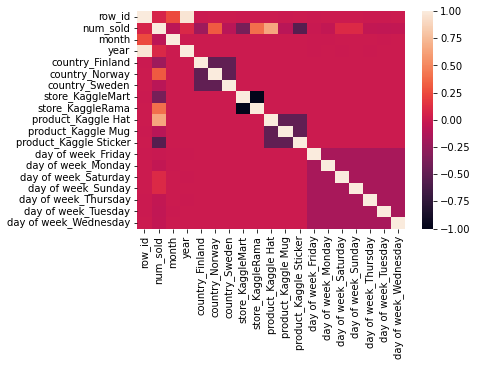

In [24]:
sns.heatmap(df_encode.corr())

In [25]:
features = ['store_KaggleMart',
            'store_KaggleRama',
            'product_Kaggle Hat',
            'product_Kaggle Mug',
            'product_Kaggle Sticker',
            'country_Norway',
            'num_sold']

df_train_final = df_encode

In [26]:
features = ['row_id',
            'store_KaggleMart',
            'store_KaggleRama',
            'product_Kaggle Hat',
            'product_Kaggle Mug',
            'product_Kaggle Sticker',
            'country_Norway',]

df_test_encode = get_features(df_test)
df_test_final = df_test_encode

In [27]:
df_train_final.to_csv('Final Train.csv', index=False)
df_test_final.to_csv('Final Test.csv', index=False)